In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display
import ipywidgets as widgets

In [4]:
covid_df = pd.read_csv("owid-covid-data.csv")

In [5]:
covid_df.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'new_tests', 'total_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'tests_per_case', 'positive_rate', 'tests_units', 'stringency_index',
       'population', 'population_density', 'median_age', 'aged_65_older',
       'aged_70_older', 'gdp_per_capita', 'extreme_poverty',
       'cardiovasc_death_rate', 'diabetes_prevalence', 'female_smokers',
       'male_smokers', 'handwashing_facilities', 'hospital_beds_per_thousand',
       'life_expectancy', 'human_development_index'],
      dtype='object')

In [6]:
death_data = ["new_deaths", "new_deaths_per_million", "total_deaths", "total_deaths_per_million"] #add death rate(and cadiovascular deaths?)
cases_data = ["new_cases", "new_cases_per_million", "total_cases", "total_cases_per_million"]
test_data = ["new_tests", "total_tests", "total_tests_per_thousand", "new_tests_per_thousand", "tests_per_case", "positive_rate"] #tests_units(?)
population_data = ["population", "population_density", "median_age", "aged_65_older", "aged_70_older", "gdp_per_capita", "extreme_poverty"]
misc_data = ["diabetes_prevelance", "female_smokers", "male_smokers", "handwashing_facilities", "hospital_beds_per_thousand", "life_expectancy", "human_development_index", "stringency_index"]




In [7]:
variables_dict = {"Deaths": death_data, "Cases": cases_data, "Tests": test_data, "Population": population_data, "Misc" : misc_data}

list(variables_dict.values())[0]

['new_deaths',
 'new_deaths_per_million',
 'total_deaths',
 'total_deaths_per_million']

In [8]:
covid_df = covid_df.loc[covid_df["location"] != "International"]
covid_df

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,ABW,North America,Aruba,2020-03-13,2.0,2.0,NaN,0.0,0.0,NaN,...,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29,NaN
1,ABW,North America,Aruba,2020-03-19,NaN,NaN,0.286,NaN,NaN,0.000,...,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29,NaN
2,ABW,North America,Aruba,2020-03-20,4.0,2.0,0.286,0.0,0.0,0.000,...,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29,NaN
3,ABW,North America,Aruba,2020-03-21,NaN,NaN,0.286,NaN,NaN,0.000,...,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29,NaN
4,ABW,North America,Aruba,2020-03-22,NaN,NaN,0.286,NaN,NaN,0.000,...,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43886,OWID_WRL,NaN,World,2020-09-12,28519191.0,305101.0,268166.000,916012.0,5881.0,5863.143,...,15469.207,10.0,233.07,8.51,6.434,34.635,60.13,2.705,72.58,NaN
43887,OWID_WRL,NaN,World,2020-09-13,28806290.0,287099.0,269207.286,920939.0,4927.0,5800.857,...,15469.207,10.0,233.07,8.51,6.434,34.635,60.13,2.705,72.58,NaN
43888,OWID_WRL,NaN,World,2020-09-14,29078936.0,272646.0,272621.143,924817.0,3878.0,5064.857,...,15469.207,10.0,233.07,8.51,6.434,34.635,60.13,2.705,72.58,NaN
43889,OWID_WRL,NaN,World,2020-09-15,29320128.0,241192.0,277613.857,929050.0,4233.0,5123.571,...,15469.207,10.0,233.07,8.51,6.434,34.635,60.13,2.705,72.58,NaN


In [9]:
def generate_plot(var1, var2, location = "World", time = ["2019-12-31"]):
    df = covid_df
    print(var1 + " vs "  + var2 + " between " + time[0] + " and " + time[1])
    if len(time) == 2:
        df = df.loc[df["date"] >= time[0]].loc[df["date"] <= time[1]]
        
    
        df = df.loc[df["location"] == location]
        if (var1 == "Time"):
            var1 = "date"
        plt.scatter(df[var1], df[var2])
        if (len(df[var2]) > 20):
            plt.xticks(rotation = 90)
    
    else:
        print(var1 + " vs " + var2 + " on " + time[0])
        df = df.loc[df["date"] == time[0]]
        plt.scatter(df[var1], df[var2])
        if (len(df[var2] > 20)):
            plt.xticks(rotation = 90)

In [10]:
dropdown_var1_type = widgets.Dropdown(description = "Choose Independent Variable" , options = ["Deaths", "Cases", "Tests", "Population", "Misc"])
def on_change(change):
    if (change.new == "Deaths"):
        opt = death_data
    elif (change.new == "Cases"):
        opt = cases_data
    elif (change.new == "Tests"):
        opt = tests_data
    elif (change.new == "Population"):
        opt = population_data
    elif (change.new == "Misc"):
        opt = population_data
    dropdown_var1 = widgets.Dropdown(description = change.new , options = opt)
    dropdown_var1.observe(on_change, names = "value")
    display(dropdown_var1)
dropdown_var1_type.observe(on_change, names = "value")
display(dropdown_var1_type)

Dropdown(description='Choose Independent Variable', options=('Deaths', 'Cases', 'Tests', 'Population', 'Misc')…

In [11]:
x = widgets.Dropdown(options = ["1", "2", "3"], value = "2", description = "Number", disabled = False)


Enter type of variable 1 out of Deaths, Cases, Tests, Population or Other: Deaths

new_deaths, new_deaths_per_million, total_deaths, total_deaths_per_million, 
Choose and enter variable 1 from the above list: new_deaths
Enter type of variable 2 out of Time, Deaths, Cases, Tests, Population or Other: Time
Enter Starting Date in YYYY-MM-DD: 2020-03-13
Enter ending date in YYYY-MM-DD: 2020-09-15
Select a country or 'World': World
Time vs new_deaths between 2020-03-13 and 2020-09-15


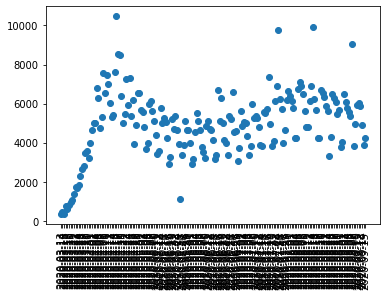

In [12]:
var1_type = input("Enter type of variable 1 out of Deaths, Cases, Tests, Population or Other: ")
if var1_type not in variables_dict.keys():
    var1_type = "Misc"
print("")
for i in variables_dict[var1_type]:
    print(i, end = ", ")
print("")
var1 = input("Choose and enter variable 1 from the above list: ")

if var1_type in ["Deaths", "Cases", "Tests"]:
    var2_type = input("Enter type of variable 2 out of Time, Deaths, Cases, Tests, Population or Other: ")
    
    if var2_type == "Time":
        date1 = input("Enter Starting Date in YYYY-MM-DD: ")
        date2 = input("Enter ending date in YYYY-MM-DD: ")
        location  = input("Select a country or 'World': ")
        generate_plot("Time", var1, location, [date1, date2])
        
    elif var2_type in ["Deaths", "Cases", "Tests"]:
        for i in variables_dict[var1_type]:
            if var1 is not i:
                print(i, end = ", ")
        var2 = input("Choose and enter variable 2 from the above list: ")
        date1 = input("Enter Starting Date in YYYY-MM-DD: ")
        date2 = input("Enter Ending Date in YYYY-MM-DD: ")
        location  = input("Select a country or 'World': ")
        generate_plot(var2, var1, location, [date1, date2])
    
    else:
        for i in variables_dict[var2_type]:
            print(i, end = ", ")
        var2 = input("Choose and enter variable 2 from the above list: ")
        date = input("Enter Date in YYYY-MM-DD: ")
        generate_plot(var2, var1, "World", [date])
else:
    var2_type = input("Enter type of variable 2 out of Deaths, Cases, Tests, Population or Other: ")
    if var2_type == "Other":
        var2_type = "Misc"
    for i in variables_dict[var2_type]:
        print(i, end = ", ")
    if var2_type in ["Deaths", "Cases", "Tests"]:
        var2 = input("Choose and enter variable 2 from the above list: ")
        date = input("Enter date in YYYY-MM-DD: ")
        generate_plot(var1, var2, "World", [date])
    else:
        var2 = input("Choose and enter variable 2 from the above list: ")
        date = input("Enter date in YYYY-MM-DD: ")
        
        
        
    
    
        


In [13]:
x = widgets.Dropdown(options = ["1", "2", "3"], value = "2", description = "Number", disabled = False)

In [14]:
display(x)

Dropdown(description='Number', index=1, options=('1', '2', '3'), value='2')

In [15]:
print("Choose type of variable 1")
var1_type = "Deaths"
drop_down = widgets.Dropdown(options = ["Deaths", "Cases", "Tests", "Population", "Misc"], description = "Choose", disabled = False)
output = widgets.Output()
def drop_handler(change):
    global var1_type
    output.clear_output()
    with output:
        var1_type = change.new
        var1 = "total_deaths"
        drop_down2 = widgets.Dropdown(options = variables_dict[var1_type], description = "Choose", disabled = False)
        def drop_handler2(change):
            global var1
            var1 = change.new
        drop_down2.observe(drop_handler2, names = "value")
        display(drop_down2)
drop_down.observe(drop_handler, names = "value")
display(drop_down)




Choose type of variable 1


Dropdown(description='Choose', options=('Deaths', 'Cases', 'Tests', 'Population', 'Misc'), value='Deaths')

In [24]:
display(output)


Output(outputs=({'output_type': 'display_data', 'data': {'text/plain': "Dropdown(description='Choose', options…

In [25]:
var1_type

'Cases'

In [26]:
variables_dict[var1_type]

['new_cases',
 'new_cases_per_million',
 'total_cases',
 'total_cases_per_million']

In [27]:
var1_type_drop = widgets.Dropdown(options = ["Deaths", "Cases", "Tests", "Population", "Misc"], description = "Var 1 Type")
var1_type = ""
var1 = ""
var2_type = ""
var2 = ""

    
output = widgets.Output()
output2 = widgets.Output()
def var1type_drop_eventhandler(change):
    output.clear_output()
    with output:
        global var1_type
        var1_type = var1_type_drop.value
        options_list = variables_dict[var1_type]

        var1_drop = widgets.Dropdown(options = options_list, description = "Variable 1")
        def var1_drop_eventhandler(change):
            with output2:
                global var1
                global var2
                var1 = var1_drop.value
                print(var1)
                if (var1 == var2):
                    print("Invalid choice, please select different variables.")
                
        var1_drop.observe(var1_drop_eventhandler, names = "value")
        display(var1_drop)
                
        var2_type_drop = widgets.Dropdown(options = ["Deaths", "Cases", "Tests", "Population", "Misc", "Time"], description = "Var 2 Type")
        def var2type_drop_eventhandler(change):
            output2.clear_output()
            with output2:
                global var2_type
                var2_type = var2_type_drop.value
                
                
                if var2_type == "Time":
                    options_list2 = ["Custom Range", "All-Time", ""]
                else:
                    options_list2 = [i for i in variables_dict[var2_type] if i is not var1]
                var2_drop = widgets.Dropdown(options = options_list2, description = "Variable 2")
                def var2_drop_eventhandler(change):
                    with output2:
                        global var2
                        var2 = var2_drop.value
                        print(var2)
                var2_drop.observe(var2_drop_eventhandler, names = "value")
                display(var2_drop)
        var2_type_drop.observe(var2type_drop_eventhandler, names = "value")
        display(var2_type_drop)
                


    
var1_type_drop.observe(var1type_drop_eventhandler, names = "value")
display(var1_type_drop)


display(output)
display(output2)

confirm = widgets.Button(description = "Confirm Variables")
display(confirm)

locations = covid_df["location"].unique()
dates = covid_df["date"].unique()
date1 = ""
date2 = ""
location = ""
out3 = widgets.Output()
def confirm_eventhandler(obj):
    out3.clear_output()
    with out3:
        if var1 == var2:
            print("Please choose different variables, variable 1 and 2 cannot be the same.")
        elif var1_type in ["Deaths", "Cases", "Tests"]:
            if var2_type == "Time":
                if var2 == "Custom Range":
                    date1_drop = widgets.Dropdown(options = dates, description = "Start Date")
                    def date1_drop_eventhandler(change):
                        global date1
                        date1 = change.new
                        date2_list = covid_df.loc[covid_df["date"] > date1]["date"].unique()
                        date2_drop = widgets.Dropdown(options = date2_list, description = "End Date")
                        def date2_drop_eventhandler(change):
                            global date2
                            date2 = change.new
                        date2_drop.observe(date2_drop_eventhandler, names = "value")
                        display(date2_drop)
                    date1_drop.observe(date1_drop_eventhandler, names = "value")
                    display(date1_drop)
                    location_drop = widgets.Dropdown(options = locations, description = "Location")
                    def location_drop_eventhandler(change):
                        global location
                        location = change.new
                    location_drop.observe(location_drop_eventhandler, names = "value")
                    display(location_drop)
confirm.on_click(confirm_eventhandler)
            
                

            


Dropdown(description='Var 1 Type', options=('Deaths', 'Cases', 'Tests', 'Population', 'Misc'), value='Deaths')

Output()

Output()

Button(description='Confirm Variables', style=ButtonStyle())

In [20]:
var1

''

In [21]:
print(date1)

In [22]:
x = list(variables_dict["Deaths"])
x.remove("new_deaths_per_million")
x

['new_deaths', 'total_deaths', 'total_deaths_per_million']

In [23]:
variables_dict["Deaths"]

['new_deaths',
 'new_deaths_per_million',
 'total_deaths',
 'total_deaths_per_million']